<a href="https://colab.research.google.com/github/Nikhil7439/Nikhil7439/blob/main/ecommerce_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
# Load cleaned data
data = pd.read_csv("Cleaned_Ecommerce_Data.csv")

In [19]:
# Set seaborn style
sns.set_theme(style="whitegrid")

In [46]:
# Display basic information about the data
print("Dataset Overview:")
data.info()
print("\nSummary Statistics:")
data.describe()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97560 entries, 0 to 97559
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  97560 non-null  object 
 1   customer_first_name          97560 non-null  object 
 2   customer_last_name           97560 non-null  object 
 3   category_name                97560 non-null  object 
 4   product_name                 97560 non-null  object 
 5   customer_segment             97560 non-null  object 
 6   customer_city                97560 non-null  object 
 7   customer_state               97560 non-null  object 
 8   customer_country             97560 non-null  object 
 9   customer_region              97560 non-null  object 
 10  delivery_status              97560 non-null  object 
 11  order_date                   97560 non-null  object 
 12  order_id                     97560 non-null  object 
 13

,days_for_shipment_scheduled,days_for_shipment_real,order_item_discount,sales_per_order,order_quantity,profit_per_order
count,97560.000000,97560.000000,97560.000000,97560.000000,97559.000000,97559.000000
mean,2.970562,3.444537,21.315947,206.490986,2.032975,23.629436
std,1.367180,1.617689,22.759331,139.518428,1.390115,104.956611
min,0.000000,0.000000,0.000000,9.990000,1.000000,-3366.000000
25%,2.000000,2.000000,6.000000,120.000000,1.000000,7.740000
50%,4.000000,3.000000,15.000000,199.919998,1.000000,33.080002
75%,4.000000,5.000000,30.000000,299.950012,3.000000,66.500000
max,4.000000,6.000000,500.000000,1999.989990,5.000000,2600.000000


######1. Top 5 order_quantity (or Products)

In [23]:

top_categories = data['order_quantity'].value_counts().head(5)  # Replace 'category_column' with your column name
print("\nTop 5 order_quantity:")
top_categories


Top 5 order_quantity:


,count
order_quantity,
1.0,54906
2.0,12993
3.0,10534
4.0,9789
5.0,9337


##### Visualization for Top Categories

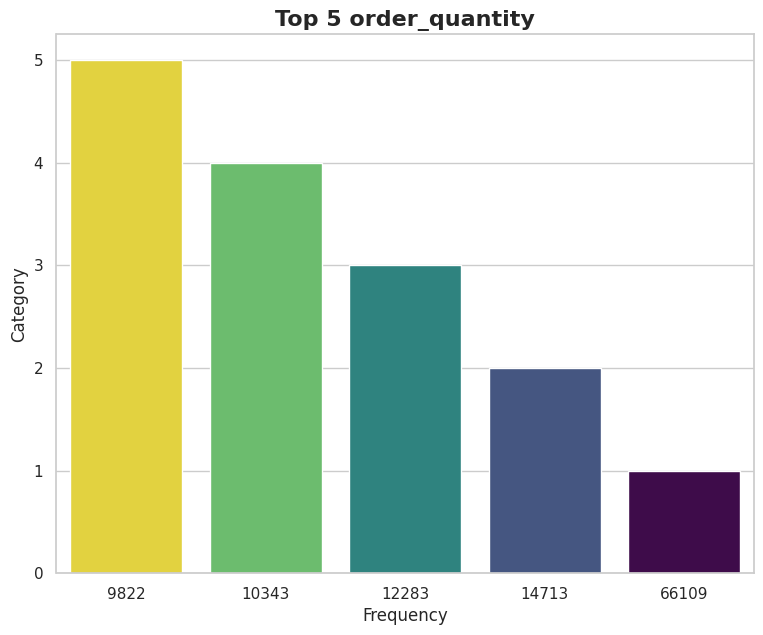

In [ ]:

plt.figure(figsize=(9, 7))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,
    dodge=False,
    palette="viridis"
)
plt.title("Top 5 order_quantity", fontsize=16, weight="bold")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.legend([], [], frameon=False)  # Removes the legend
plt.show()


##### 5. Revenue Contribution by Top Products

In [47]:
top_profit = data.groupby('profit_per_order')['customer_state' ].min().sort_values(ascending=False).head(5)
print("\nTop 5 profit per order by customer_state :")
top_profit



Top 5 profit per order by customer_state :


,customer_state
profit_per_order,
79.269997,Wyoming
-93.050003,Wisconsin
-131.119995,Wisconsin
-47.910000,Wisconsin
-232.399994,Wisconsin


##### 3. Correlation Analysis for Numeric Features

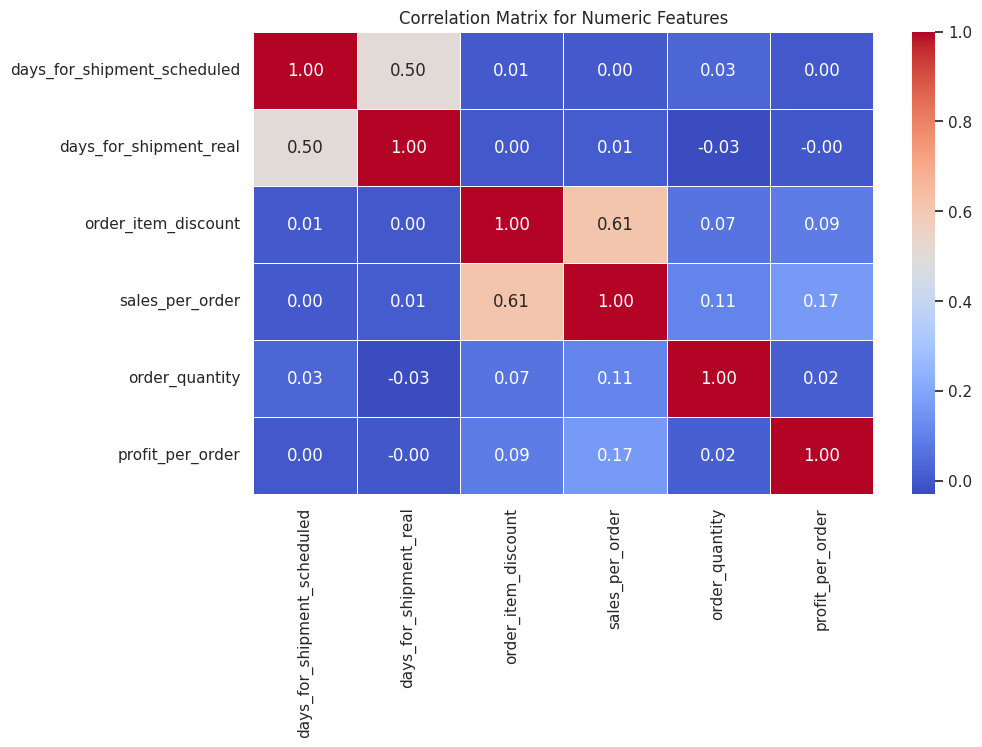

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features")
plt.show()


#### 4. Distribution Analysis

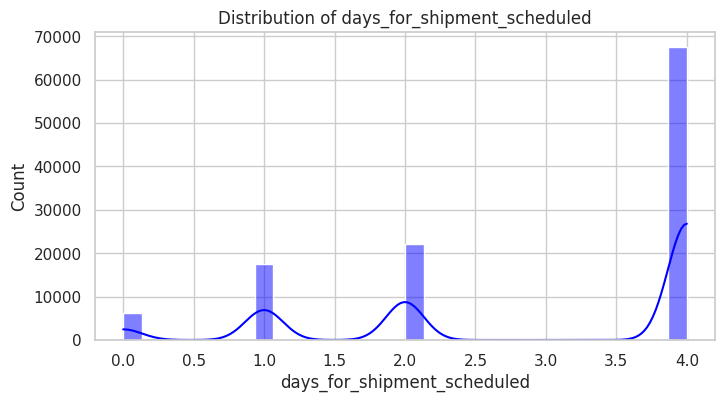

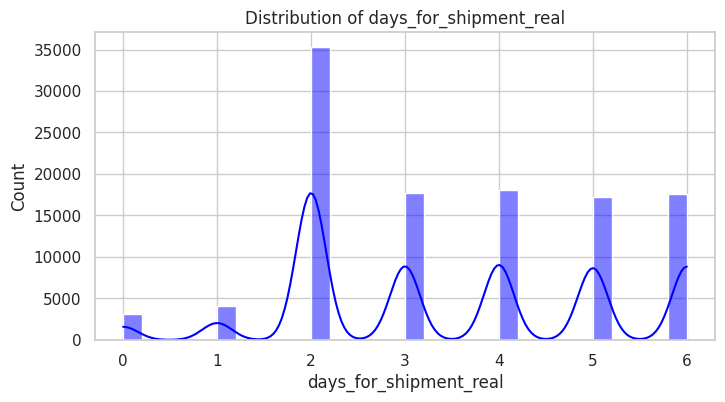

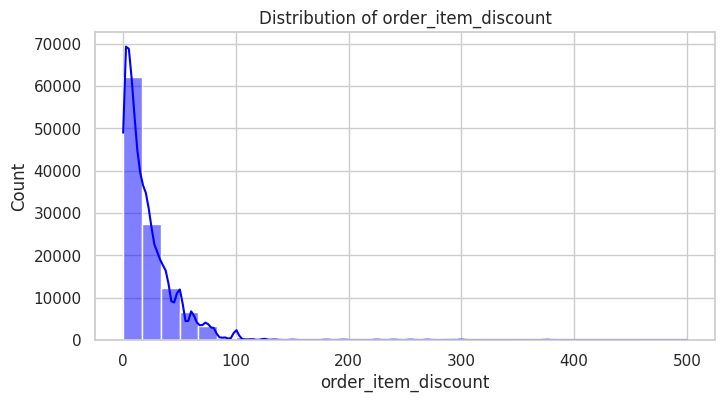

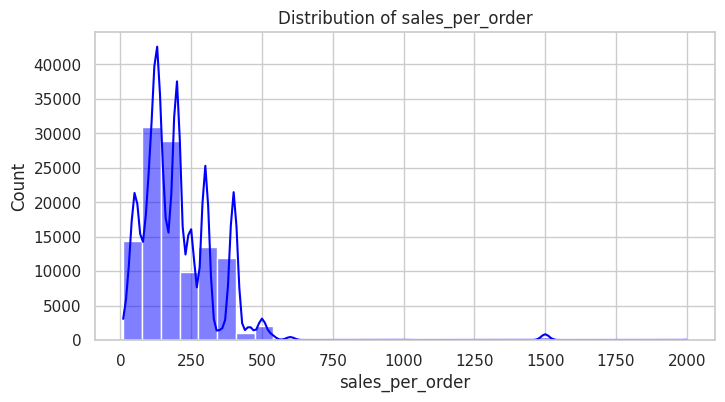

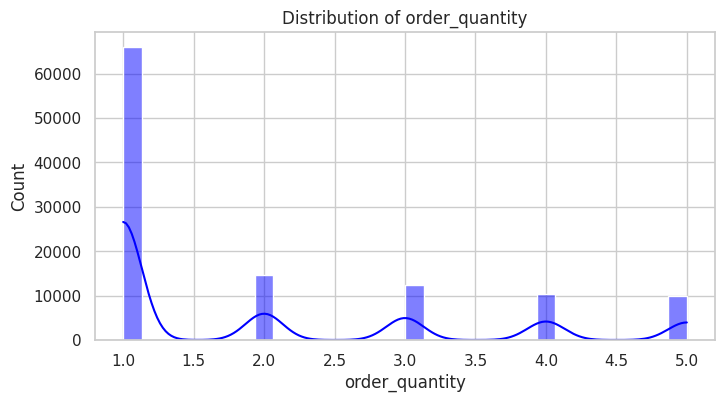

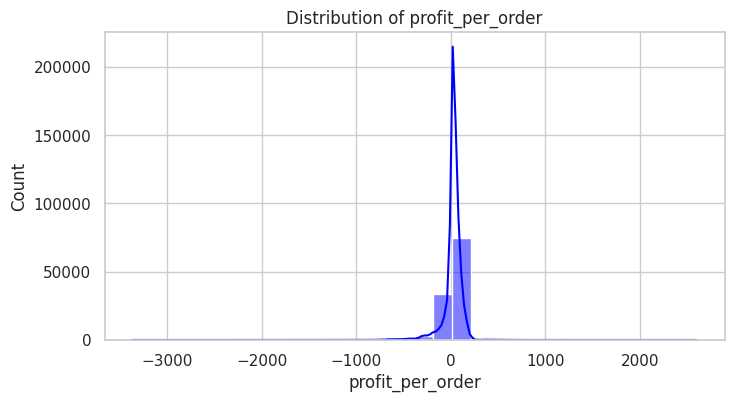

In [ ]:
numeric_columns = ['days_for_shipment_scheduled', 'days_for_shipment_real',
                   'order_item_discount', 'sales_per_order',
                   'order_quantity', 'profit_per_order']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

#### 5. Outlier Detection

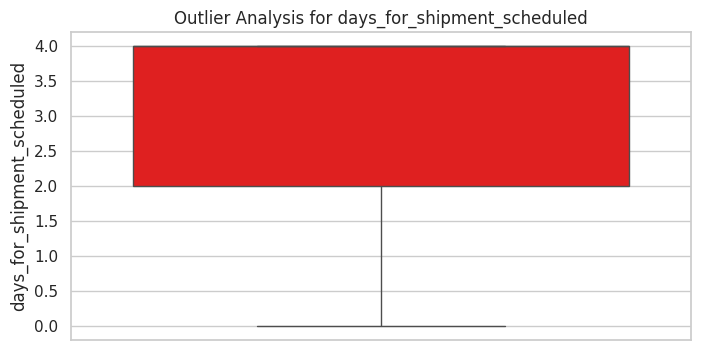

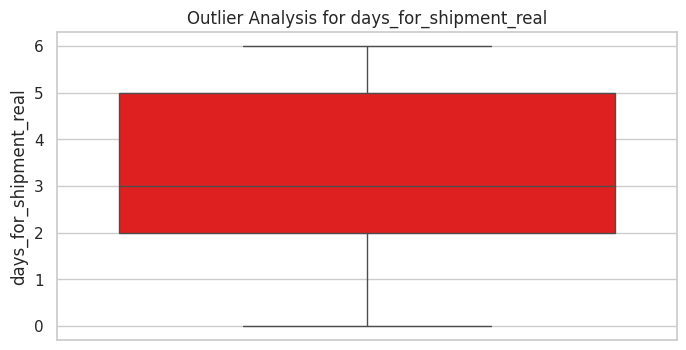

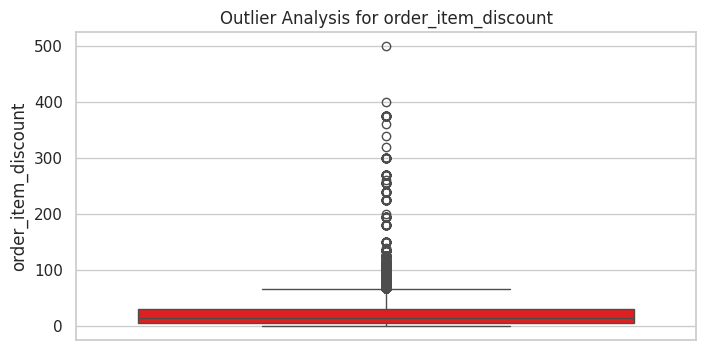

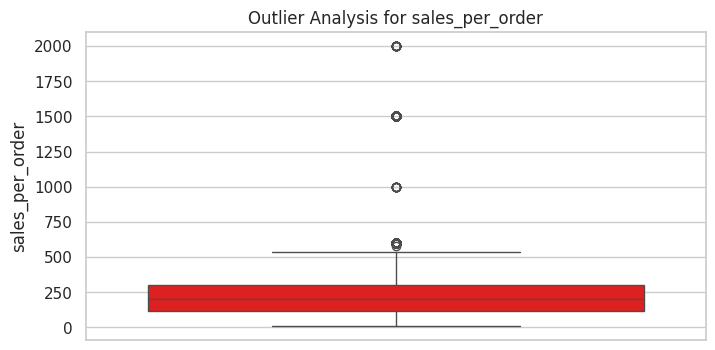

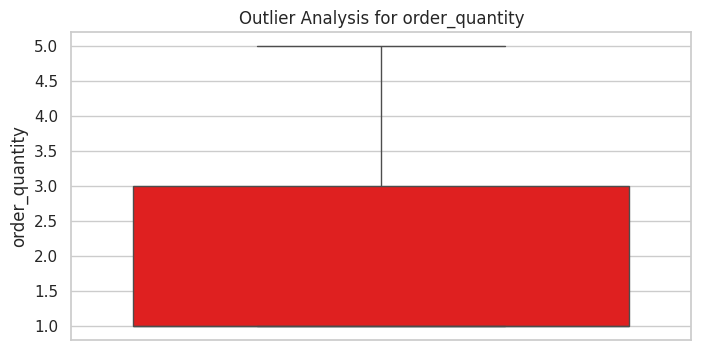

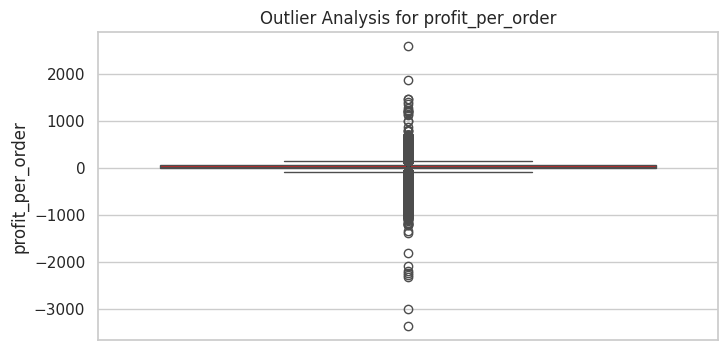

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col], color='red')
    plt.title(f"Outlier Analysis for {col}")
    plt.show()

#### monthly average sale per order

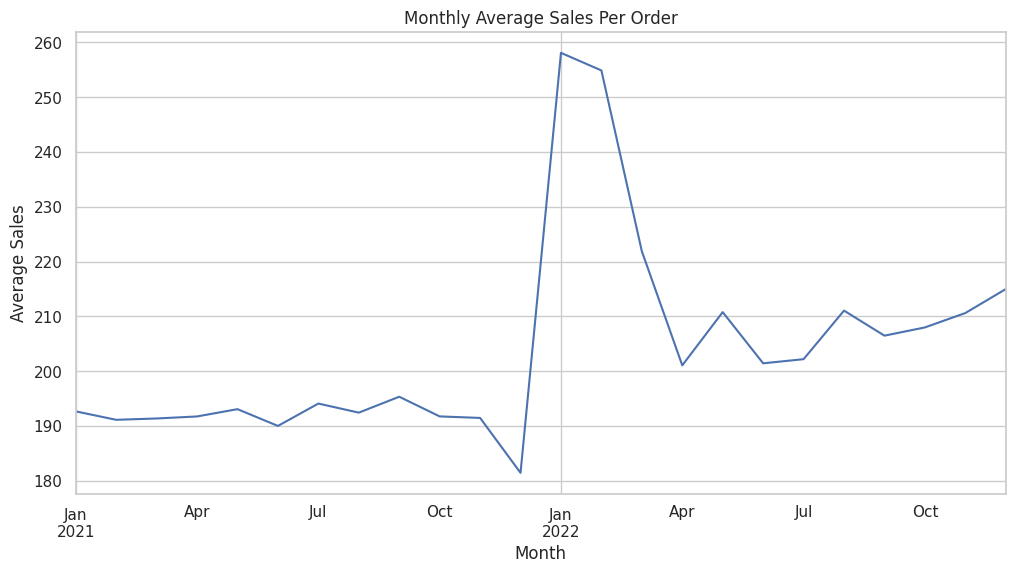

In [25]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')  # Ensure date parsing
sales_trend = data.groupby(data['order_date'].dt.to_period('M'))['sales_per_order'].mean()

plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title("Monthly Average Sales Per Order")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True)
plt.show()

#### 7. shipping type Analysis

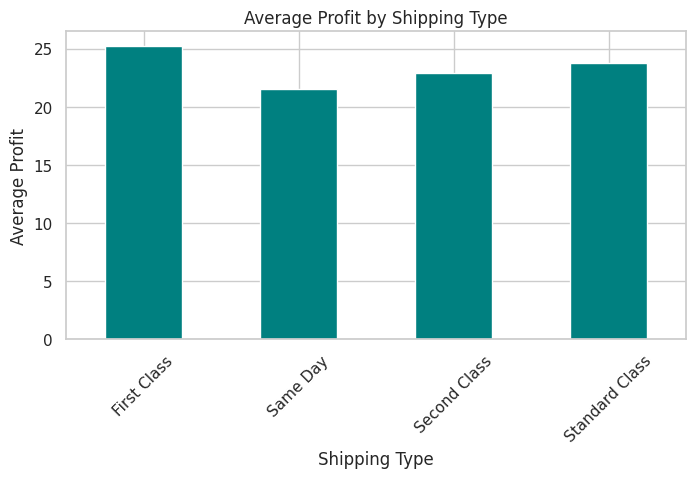

In [26]:
# Example: Average profit by shipping type
avg_profit_by_shipping = data.groupby('shipping_type')['profit_per_order'].mean()

plt.figure(figsize=(8, 4))
avg_profit_by_shipping.plot(kind='bar', color='teal')
plt.title("Average Profit by Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Average Profit")
plt.xticks(rotation=45)
plt.show()

In [49]:
top_products = data.groupby('product_name')['sales_per_order'].sum().sort_values(ascending=False).head(10)
top_products_data = pd.DataFrame({
    'Product Name': top_products.index,
    'Total Sales': top_products.values
})
print("Top 10 Products by Sales:")
top_products_data

Top 10 Products by Sales:


,Product Name,Total Sales
0,Staples,101089.645822
1,Staple envelope,100875.681990
2,Easy-staple paper,86435.975642
3,KI Adjustable-Height Table,40191.138755
4,Staples in misc. colors,38814.280583
5,Avery Non-Stick Binders,38756.778782
6,Staple remover,35024.550578
7,Staple-based wall hangings,33085.718552
8,Storex Dura Pro Binders,31924.670641
9,"Situations Contoured Folding Chairs, 4/Set",30820.348593


In [28]:
top_customers = data.groupby('customer_id')['sales_per_order'].sum().sort_values(ascending=False).head(10)
top_customers_df = pd.DataFrame({
    'Customer ID': top_customers.index,
    'Total Sales': top_customers.values
})

print("Top 10 Customers by Total Sales:")
top_customers_df

Top 10 Customers by Total Sales:


,Customer ID,Total Sales
0,C_ID_43319,3552.860016
1,C_ID_54153,3489.950012
2,C_ID_52997,3377.750000
3,C_ID_47998,3199.870025
4,C_ID_41932,3000.000000
5,C_ID_63288,2999.860031
6,C_ID_57604,2814.540018
7,C_ID_28784,2781.990036
8,C_ID_42758,2779.880035
9,C_ID_51208,2739.920006


In [30]:
top_categories = data.groupby('category_name')['profit_per_order'].sum().sort_values(ascending=False)
top_categories_df = pd.DataFrame({
    'Category Name': top_categories.index,
    'Total Profit': top_categories.values
})
print("Profit by Category:")
top_categories_df

Profit by Category:


,Category Name,Total Profit
0,Office Supplies,1.380635e+06
1,Furniture,4.983002e+05
2,Technology,4.263287e+05


In [34]:
top_regions = data.groupby('customer_region')['sales_per_order'].sum().sort_values(ascending=False)
top_regions_df = pd.DataFrame({
    'Region': top_regions.index,
    'Total Sales': top_regions.values
})
print("Sales by Region:")
top_regions_df

Sales by Region:


,Region,Total Sales
0,West,6.462437e+06
1,East,5.738368e+06
2,Central,4.674777e+06
3,South,3.269549e+06


In [36]:
shipping_performance = data.groupby('shipping_type').agg({
    'sales_per_order': 'sum',
    'profit_per_order': 'sum',
    'order_quantity': 'sum'
}).sort_values(by='sales_per_order', ascending=False)
shipping_performance_df = pd.DataFrame({
    'Shipping Type': shipping_performance.index,
    'Total Sales': shipping_performance['sales_per_order'].values,
    'Total Profit': shipping_performance['profit_per_order'].values,
    'Total Quantity': shipping_performance['order_quantity'].values
})
print("Shipping Type Performance Analysis:")
shipping_performance_df

Shipping Type Performance Analysis:


,Shipping Type,Total Sales,Total Profit,Total Quantity
0,Standard Class,1.231693e+07,1.414397e+06,123070.0
1,Second Class,3.975191e+06,4.415996e+05,38480.0
2,First Class,2.694127e+06,3.253113e+05,25099.0
3,Same Day,1.158886e+06,1.239562e+05,11686.0


In [51]:
top_cities = data.groupby('customer_city')['sales_per_order'].sum().sort_values(ascending=False).head(10)
top_cities_df = pd.DataFrame({
    'City': top_cities.index,
    'Total Sales': top_cities.values
})
print("Top 10 Cities by Sales:")
top_cities_df

Top 10 Cities by Sales:


,City,Total Sales
0,New York City,1.820257e+06
1,Los Angeles,1.540489e+06
2,Philadelphia,1.087008e+06
3,San Francisco,1.025478e+06
4,Seattle,8.509542e+05
5,Houston,7.530142e+05
6,Chicago,6.308304e+05
7,Columbus,4.542638e+05
8,San Diego,3.463097e+05
9,Springfield,3.202631e+05


In [52]:
delivery_status_count = data['delivery_status'].value_counts()
delivery_status_df = pd.DataFrame({
    'Delivery Status': delivery_status_count.index,
    'Count': delivery_status_count.values
})
print("Delivery Status Distribution:")
delivery_status_df

Delivery Status Distribution:


,Delivery Status,Count
0,Late delivery,49188
1,Advance shipping,23471
2,Shipping on time,20079
3,Shipping canceled,4822


## sales by category , product , region in the sunburst chat

In [6]:
fig_sunburst = px.sunburst(
    data_frame=data,
    path=['category_name', 'product_name', 'customer_region'],
    values='sales_per_order',
    color='sales_per_order',
    title='Deep and Vibrant Sunburst Chart: Sales by Category, Product, and Region',
    color_continuous_scale='Turbo',
    labels={'sales_per_order': 'Sales'}
)

fig_sunburst.update_traces(
    hovertemplate='<b>%{label}</b><br>Sales: %{value}<br>Parent: %{parent}',
    marker=dict(line=dict(color='orange', width=0))
)

fig_sunburst.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_font_size=20,
    title_x=0.5,
    uniformtext=dict(minsize=10, mode='hide')
)

fig_sunburst.show()
